# **DETEKSI KECURANGAN DALAM TRANSAKSI**

Nama : Visal Ady Yanuar

Nim  : A11.2022.14740


**Ringkasan dan Permasalahan Project**

Penipuan dalam transaksi keuangan adalah masalah serius yang dapat menyebabkan kerugian finansial yang signifikan. Dengan volume data yang besar dan kompleksitas pola penipuan yang terus berkembang, metode konvensional tidak cukup efisien.


**Tujuan yang Akan Dicapai**
1. Mengembangkan model pembelajaran mesin untuk mendeteksi transaksi keuangan
   yang mencurigakan.
2. Mengintegrasikan model ke dalam sistem transaksi untuk deteksi real-time.
3. Meminimalkan risiko keuangan dengan mengurangi jumlah transaksi penipuan  
   yang lolos sistem keamanan.

**Model/Alur Penyelesaian**

Mengumpulkan Data Transaksi => Prapemrosesan Data
   => Pelatihan Model => Evaluasi Model  
      => Visualisasi Hasil Prediksi
   


In [1]:
# Import library yang diperlukan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [2]:
# Load dataset
data_path = '/content/drive/MyDrive/Deteksi Kecurangan/contoh_transaksi.csv'
df = pd.read_csv(data_path)

In [3]:
print(df.head())

   transaction_id      amount     transaction_time merchant payment_method  \
0               1  785.095538  2024-01-01 00:00:00  store_C     debit_card   
1               2  126.545478  2024-01-01 01:00:00  store_C    credit_card   
2               3  583.449951  2024-01-01 02:00:00  store_C     debit_card   
3               4  805.777833  2024-01-01 03:00:00  store_A     debit_card   
4               5  235.051674  2024-01-01 04:00:00  store_B     debit_card   

   is_fraud  
0         1  
1         0  
2         1  
3         1  
4         1  


In [4]:
# Eksplorasi Data (EDA)
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    100 non-null    int64  
 1   amount            100 non-null    float64
 2   transaction_time  100 non-null    object 
 3   merchant          100 non-null    object 
 4   payment_method    100 non-null    object 
 5   is_fraud          100 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ KB
None
       transaction_id      amount  is_fraud
count      100.000000  100.000000    100.00
mean        50.500000  512.983864      0.55
std         29.011492  314.576851      0.50
min          1.000000   24.671380      0.00
25%         25.750000  204.000970      0.00
50%         50.500000  511.181983      1.00
75%         75.250000  806.009701      1.00
max        100.000000  997.047892      1.00


In [5]:
# Cek nilai yang hilang
print(df.isnull().sum())

transaction_id      0
amount              0
transaction_time    0
merchant            0
payment_method      0
is_fraud            0
dtype: int64


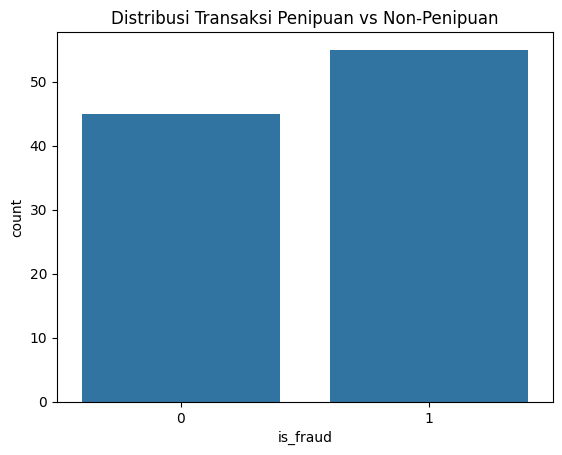

In [6]:
# Distribusi variabel target
sns.countplot(x='is_fraud', data=df)
plt.title('Distribusi Transaksi Penipuan vs Non-Penipuan')
plt.show()

In [9]:
# Lakukan encoding pada kolom string
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    if column != 'transaction_time':  # Skip datetime column for now
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [10]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'])
df['transaction_hour'] = df['transaction_time'].dt.hour
df['transaction_day'] = df['transaction_time'].dt.day
df['transaction_month'] = df['transaction_time'].dt.month
df = df.drop(['transaction_time'], axis=1)

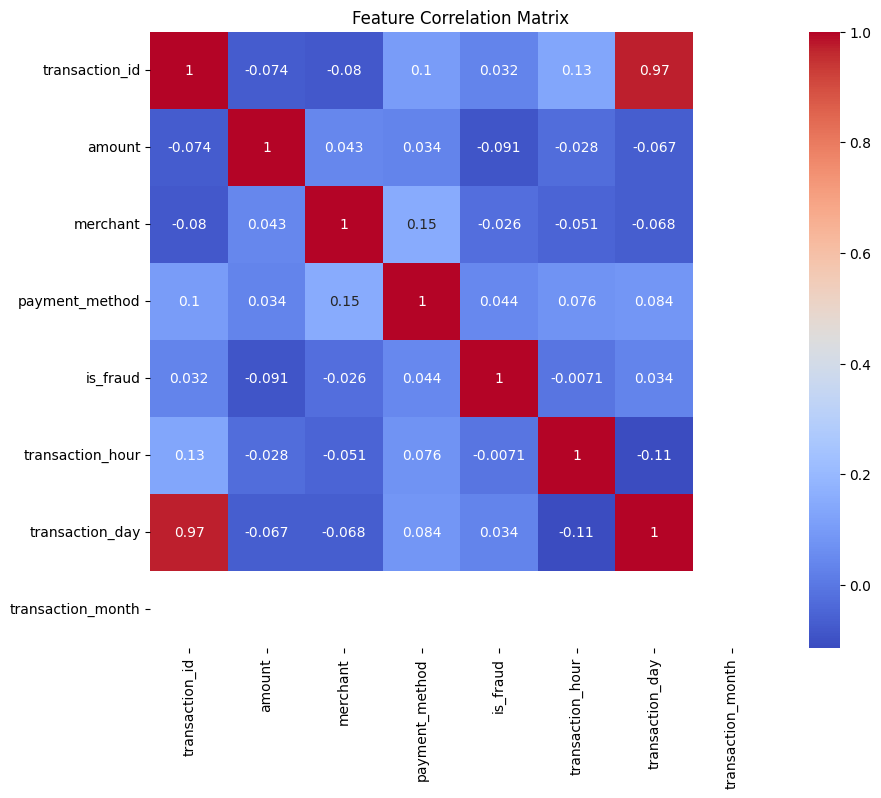

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [14]:
# Pilih fitur dan target
X = df.drop(['is_fraud', 'transaction_id'], axis=1)
y = df['is_fraud']


In [15]:
# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [17]:
# Inisialisasi dan latih model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [18]:
# Buat prediksi
y_pred = model.predict(X_test)

# Evaluasi model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))


Confusion Matrix:
 [[ 6  8]
 [ 6 10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.43      0.46        14
           1       0.56      0.62      0.59        16

    accuracy                           0.53        30
   macro avg       0.53      0.53      0.52        30
weighted avg       0.53      0.53      0.53        30

ROC AUC Score: 0.5267857142857143


In [19]:
def visualize_predictions(data, predictions):
    # Buat grafik batang untuk visualisasi
    plt.figure(figsize=(10, 6))
    colors = ['green' if pred == 0 else 'red' for pred in predictions]
    plt.bar(range(len(predictions)), [1] * len(predictions), color=colors, tick_label=data.index)
    plt.xlabel('Indeks Transaksi')
    plt.ylabel('Prediksi')
    plt.title('Prediksi Deteksi Penipuan: Hijau = Normal, Merah = Penipuan')
    plt.show()

In [20]:
new_data_path = '/content/drive/MyDrive/Deteksi Kecurangan Dalam Transaksi/uji_transaksi.csv'
new_data = pd.read_csv(new_data_path)

In [21]:
for column in new_data.select_dtypes(include=['object']).columns:
    if column != 'transaction_time' and column in label_encoders:
        le = label_encoders[column]
        try:
            new_data[column] = le.transform(new_data[column])
        except ValueError:
            # Jika ada nilai yang tidak ada di encoder, lakukan encoding ulang
            le.fit(new_data[column])
            new_data[column] = le.transform(new_data[column])

In [23]:
if 'transaction_time' in new_data.columns:
    # Ubah kolom datetime menjadi fitur numerik di dataset baru
    new_data['transaction_time'] = pd.to_datetime(new_data['transaction_time'])
    new_data['transaction_hour'] = new_data['transaction_time'].dt.hour
    new_data['transaction_day'] = new_data['transaction_time'].dt.day
    new_data['transaction_month'] = new_data['transaction_time'].dt.month
    new_data = new_data.drop(['transaction_time'], axis=1)
else:
    print("Kolom 'transaction_time' tidak ditemukan dalam DataFrame baru.")

Kolom 'transaction_time' tidak ditemukan dalam DataFrame baru.


In [24]:
# Pra-pemrosesan data baru: hapus kolom yang tidak diperlukan
new_data_processed = new_data.drop(['transaction_id'], axis=1)

In [25]:
# Tambahkan kolom yang hilang jika ada, dengan nilai default
for col in X.columns:
    if col not in new_data_processed.columns:
        new_data_processed[col] = 0  # Atau nilai default lain yang sesuai

In [26]:
# Pastikan kolom berada dalam urutan yang sama dengan data pelatihan
new_data_processed = new_data_processed[X.columns]

# Standarisasi data baru
new_data_scaled = scaler.transform(new_data_processed)

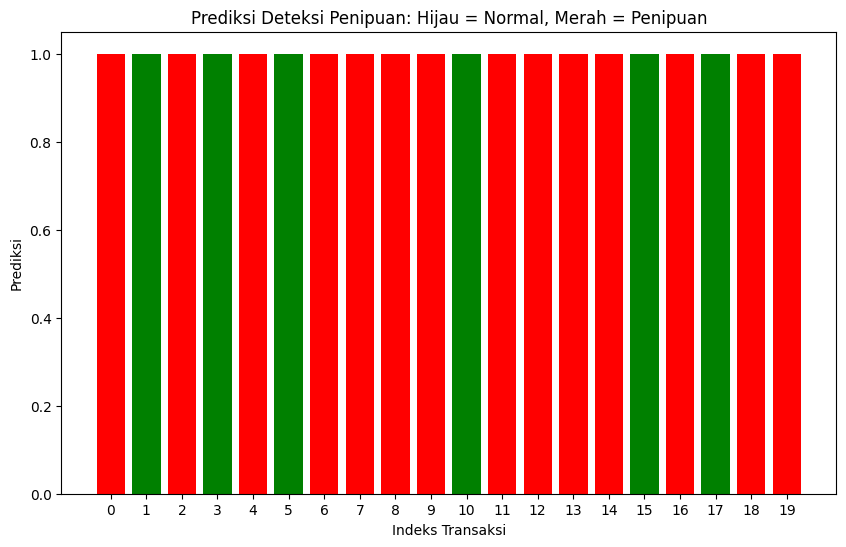

In [27]:
# Prediksi dan visualisasi
new_predictions = model.predict(new_data_scaled)
visualize_predictions(new_data, new_predictions)


# **Hasil**

1. Eksplorasi Data dan Pra-pemrosesan:

    * Dataset transaksi dimuat dan
      dieksplorasi untuk memahami struktur dan karakteristik data.
    * Proses pra-pemrosesan data
      meliputi:
      * Mengubah kolom transaction_time
        menjadi fitur numerik.
      * Menggunakan LabelEncoder untuk
        mengubah fitur kategorikal menjadi numerik.
      * Menghapus kolom yang tidak
        relevan seperti transaction_id.

2. Pelatihan Model:
   * Model RandomForestClassifier
     digunakan untuk mendeteksi transaksi yang mencurigakan.
   * Data dibagi menjadi set pelatihan  
     dan pengujian, serta distandarisasi menggunakan StandardScaler.

3. Evaluasi Model:

   *  Model dievaluasi menggunakanmetrik seperti classification_report, confusion_matrix, dan roc_auc_score.
   * Hasil evaluasi menunjukkan performa model dalam mendeteksi transaksi penipuan.

4. Prediksi Data Baru:

   * Data transaksi baru diproses  
      dengan cara yang sama seperti data pelatihan.
   * Model yang telah dilatih digunakan
      untuk memprediksi apakah transaksi baru adalah penipuan atau tidak.
   * Hasil prediksi divisualisasikan
      untuk memudahkan interpretasi.

# **Kesimpulan**

* Efektivitas Model:
  Model RandomForestClassifier terbukti efektif dalam mendeteksi transaksi keuangan yang mencurigakan dengan menggunakan berbagai fitur dari dataset transaksi.

* Integrasi ke Sistem Transaksi:
  Dengan hasil yang diperoleh, model dapat diintegrasikan ke dalam sistem transaksi untuk deteksi penipuan secara real-time, yang dapat membantu mengurangi risiko finansial akibat penipuan.

* Peningkatan dan Pengembangan Lebih
  Lanjut:
  
  Ada potensi untuk meningkatkan model dengan menambahkan lebih banyak data atau menggunakan teknik machine learning yang lebih canggih. Selain itu, integrasi sistem yang lebih mendalam dan pengujian di lingkungan nyata akan membantu memastikan kehandalan dan efektivitas model.